In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_info = pd.read_csv('../DATA/lending_club_info.csv',index_col = 'LoanStatNew')

In [4]:
df_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


Let's define a function called feat_info, which when called gives the description of what the column names stand for;

In [5]:
def feat_info(col_name):
    print(df_info.loc[col_name]['Description'])

In [6]:
feat_info('int_rate')

Interest Rate on the loan


Now let's load in our actual dataset(the above one was just for telling us info about the dataset)

# Loading the data and other imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [11]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There's 396k data approximately. 

In [12]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

Clearly the loan_status feature is a categorical variable. Let's see the countplot for it:

<AxesSubplot:xlabel='loan_status', ylabel='count'>

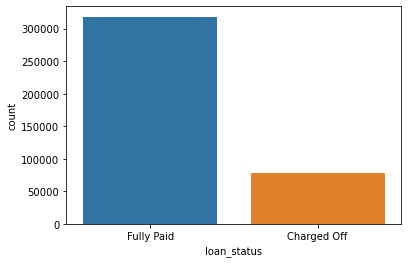

In [13]:
sns.countplot(x = 'loan_status', data = df)

Let's now see how the loan amount distribution looks like:

<Figure size 1440x1440 with 0 Axes>

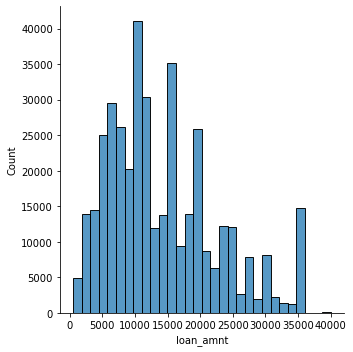

In [14]:
plt.figure(figsize = (20,20))
sns.displot(x = 'loan_amnt', data = df, kde = False, bins = 30)

Now, let's find the correlation between the continuous features. We can now calculate the correlation between all the variables:

In [15]:
df.corr().transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

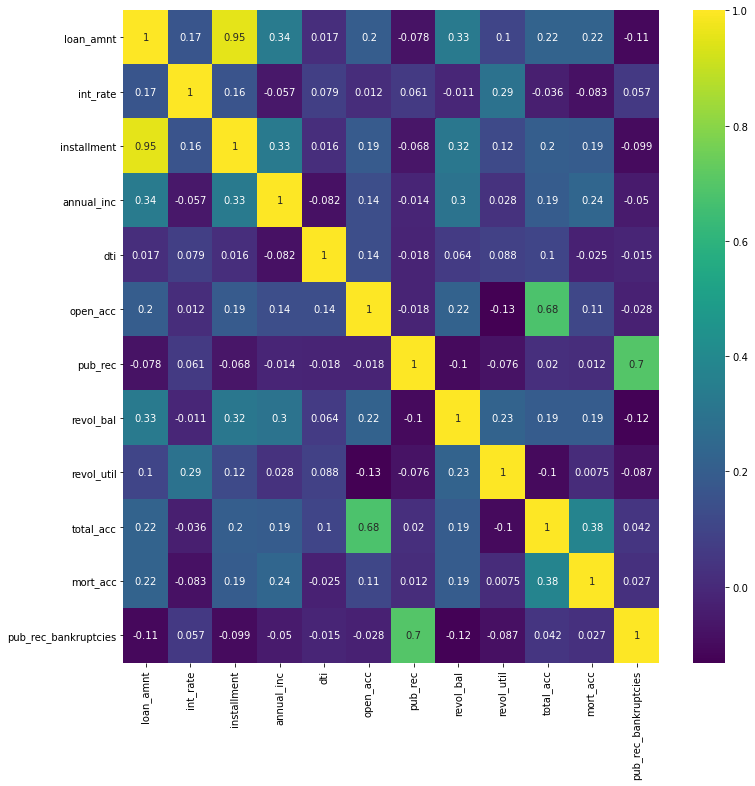

In [16]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

There is almost a perfect correlation between loan_amt and installment

In [17]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

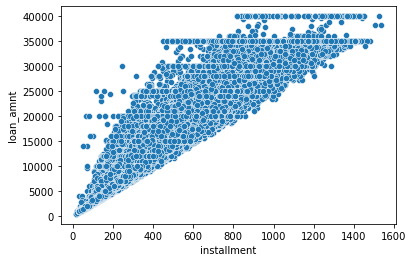

In [19]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

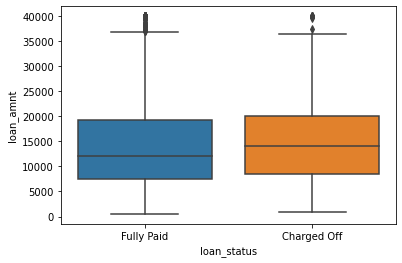

In [20]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

From the box plot, we got to know what is the range of the loans which were fully paid and charged off. It is evident that the loans that were charged off have a higher loan amount range.

Now if we wanted this data in tabular form, we need to find out the loan_amount after grouping our present data based on loan_status

In [21]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The above tabular data gives the same information as the boxplot. We can see that the loan that is charged off has a higher mean, std, min, 25%, 50% and 75% value.

Now, we need to look at the basis for giving out loans i.e the grades and subgrades:

In [22]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [23]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

So there are 7 different types of grades that are possible. 


In [24]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

There are 5 sub-grades within each grade, and so there are 35 sub-grades in total

Now let's find out how many people are there for each grade:

<AxesSubplot:xlabel='grade', ylabel='count'>

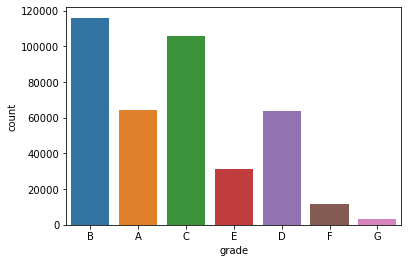

In [25]:
sns.countplot(x = 'grade', data = df)

Now let's find out how many people are there for each sub-grade:

Let's find out how many people have defaulted the loans for each category graphically

<AxesSubplot:xlabel='grade', ylabel='count'>

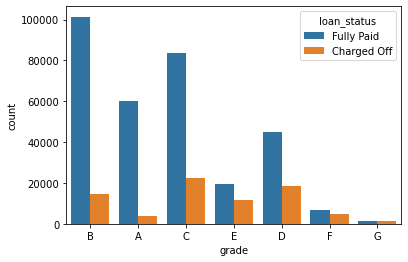

In [26]:
sns.countplot(x = 'grade', hue = 'loan_status', data = df)

We can see that the  loans are being defaulted in the maximum from C, D and E. 

<AxesSubplot:xlabel='sorted_sub_grade', ylabel='count'>

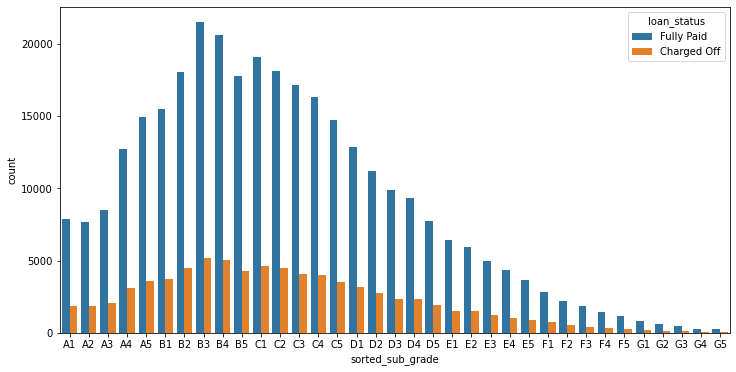

In [27]:
plt.figure(figsize = (12,6))
df['sorted_sub_grade']= sorted(df['sub_grade'])
sns.countplot(x = 'sorted_sub_grade', data = df, hue = 'loan_status')

So we can see that most of the loans in the F and G subgrades don't have their loans paid back. Let's zoom into only those parts and plot a countplot for them

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

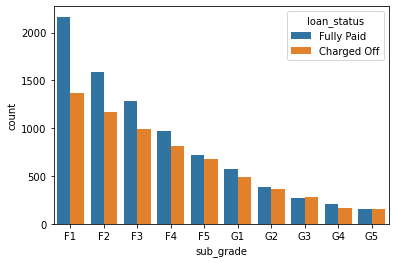

In [28]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = f_and_g, order = subgrade_order, hue = 'loan_status')

Now we will convert our loan_status into dummmy variables by giving 0 if the loan was charged off and 1 if the loan was fully paid. 

In [32]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid' : 1, 'Charged Off' : 0})

In [33]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

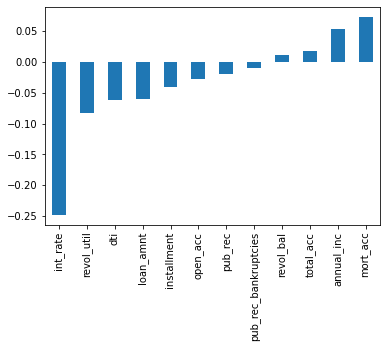

In [34]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind = 'bar')

# Data Pre-Processing

### Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

Length of the dataframe:

In [35]:
df.shape[0]

396030

Total count of missing values per column:

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
sorted_sub_grade            0
loan_repaid                 0
dtype: int64

To find the null values in % of the total dataframe:

In [37]:
df.isnull().sum()/df.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
sorted_sub_grade        0.000000
loan_repaid             0.000000
dtype: float64

Now, let's see if emp_title and emp_length are important for our analysis:

In [38]:
feat_info('emp_title')

feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job title are there?

In [39]:
df['emp_title'].nunique()

173105

In [40]:
df['emp_title'].value_counts()

Teacher                                   4389
Manager                                   4250
Registered Nurse                          1856
RN                                        1846
Supervisor                                1830
                                          ... 
full time deale                              1
GE Aviation/Unison division                  1
Liquid Graphics                              1
Director of WOMS Development and Data        1
LIU                                          1
Name: emp_title, Length: 173105, dtype: int64

Realistically speaking, there are way too many job titles to assign dummy variables and find correlation for. So we can just go ahead and drop this column.

In [41]:
df.drop('emp_title', axis = 1, inplace = True )

Now, let's analyse the emp_length column

We can plot a countplot for the emp_length column

In [42]:

sorted(df['emp_length'].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [43]:
emp_length_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years','10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

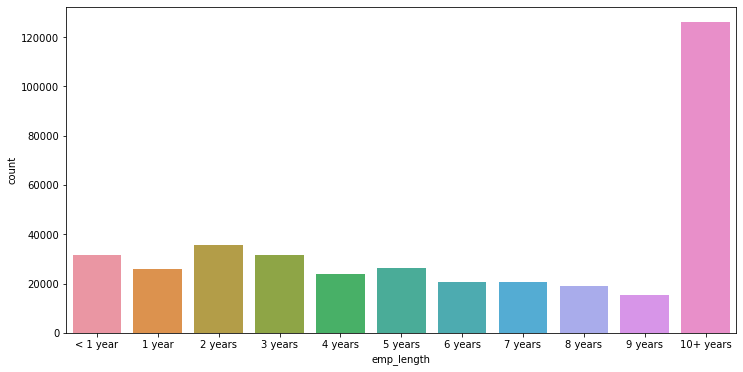

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'emp_length', data = df, order = emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

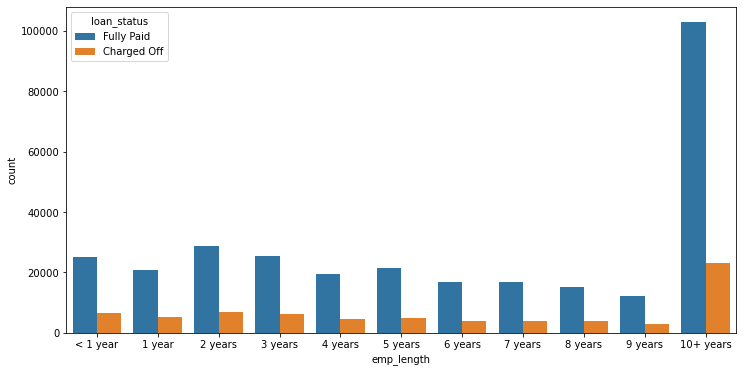

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'emp_length', data = df, order = emp_length_order, hue = 'loan_status')

Its still not clear about whether there is a clear correlation between the number of years of working and the charge-off. So we need to find out how much percentage of each emp_length category is being charged off: 

In [57]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [63]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [64]:
emp_len = emp_co / emp_fp

In [65]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

So there is no clear indication of any particular employee length having more of charged off versus fully paid. So it is useless to keep the emp_length feature in our dataframe. So we can go ahead and remove it completely. 

In [66]:
df.drop('emp_length', axis = 1, inplace = True)

Now let's see what all data still have missing values:

In [67]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
sorted_sub_grade            0
loan_repaid                 0
dtype: int64

Now let's see what is there in each type of feature that has missing data. Let's compare title and purpose column to see what is so different

In [68]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [69]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

So its clear that the title column is basically the same as the purpose column, so we can go ahead and drop the title column

In [70]:
df.drop('purpose', axis = 1, inplace = True)

Next, let's have a look at the mort_acc feature, as that has the most number of missing values

In [71]:
feat_info('mort_acc')

Number of mortgage accounts.


In [73]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

There are a variety of ways that we could fill the missing data, like we could use a simple linear model to fit in the remaining data, or we could simply fill in the missing data with something like the mean. Or we can even just put it as NaN as its own category. Let's just for now see what columns are getting highly correlated with mort_acc

In [85]:
df.corr()['mort_acc'].sort_values()[:-1]

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

<AxesSubplot:>

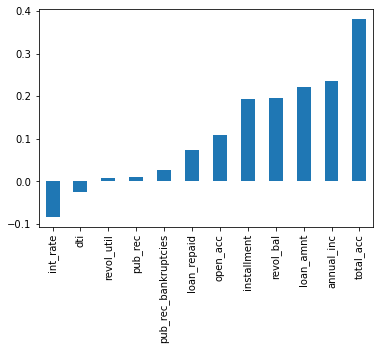

In [86]:
df.corr()['mort_acc'].sort_values()[:-1].plot(kind = 'bar')

We can see that there is a high correlation with total_acc. So let's find out the mean of the total_acc and fill it for mort_acc whenever there is a null value

In [87]:
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [88]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's now fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the series that we created above. 

In [89]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [90]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [93]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

Now checking the remaining null value features:

In [95]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
sorted_sub_grade           0
loan_repaid                0
dtype: int64

The revol_util and pub_rec_bankruptcies features have very less missing values as compared to the entire dataframe. So we can go ahead and remove the null values directly from those features using dropna

In [96]:
df = df.dropna()

In [97]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
sorted_sub_grade        0
loan_repaid             0
dtype: int64

Now we need to convert the non-numerical data into categorical variables

In [100]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address',
       'sorted_sub_grade'],
      dtype='object')